In [18]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc90/BHOSS_CODE"
data = "Rh160_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A0_150.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9533.321479 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.00097304
Total flux = 2.092219 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9994.199844 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000706467
Total flux = 2.093195 Jy at 230 GHz
137:45:36.638 - Start Program


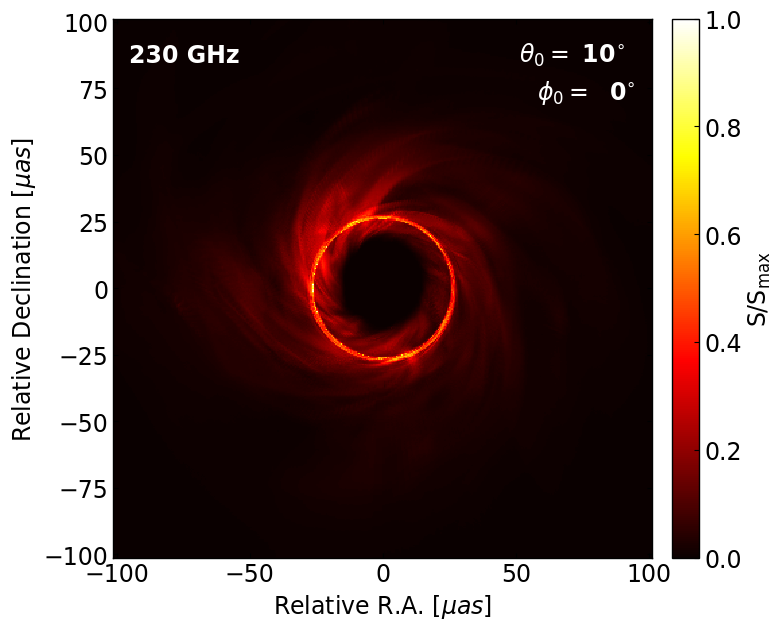

In [10]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [2]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 10, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc10/BHOSS_CODE
97, flux: 2.440958 at 9004.234232
98, flux: 2.446956 at 9014.746059
99, flux: 2.452000 at 9023.505435
100, flux: 2.386369 at 9034.016452
101, flux: 2.295903 at 9044.529609
102, flux: 2.248823 at 9053.290056
103, flux: 2.198328 at 9063.802536
104, flux: 2.142806 at 9074.314016
105, flux: 2.172897 at 9084.823874
106, flux: 2.181583 at 9093.581252
107, flux: 2.216860 at 9104.090482
108, flux: 2.256093 at 9114.601360
109, flux: 2.213895 at 9123.359993
110, flux: 2.161943 at 9133.870253
111, flux: 2.151191 at 9144.379583
112, flux: 2.159754 at 9154.889223
113, flux: 2.139256 at 9163.648327
114, flux: 2.127918 at 9174.157990
115, flux: 2.193245 at 9184.666192
116, flux: 2.249563 at 9193.424046
117, flux: 2.228169 at 9203.933544
118, flux: 2.219323 at 9214.444133
119, flux: 2.211744 at 9224.955775
120, flux: 2.181635 at 9233.717169
121, flux: 2.160950 at 9244.228854
122, flux: 2.171353 at 9254.740756
123, flu

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.106506 Jy, the density scale = 4.180000e-18


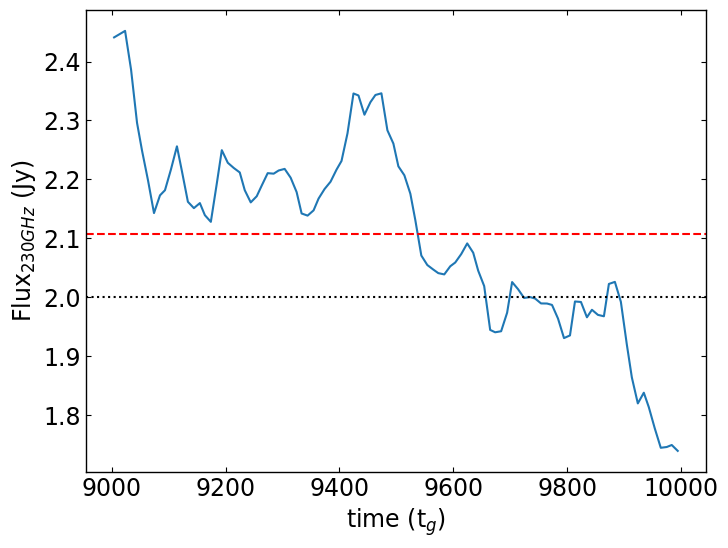

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.440958 Jy at 9004.234232
98:: 2.446956 Jy at 9014.746059
99:: 2.452000 Jy at 9023.505435
100:: 2.386369 Jy at 9034.016452
101:: 2.295903 Jy at 9044.529609
102:: 2.248823 Jy at 9053.290056
103:: 2.198328 Jy at 9063.802536
104:: 2.142806 Jy at 9074.314016
105:: 2.172897 Jy at 9084.823874
106:: 2.181583 Jy at 9093.581252
107:: 2.216860 Jy at 9104.090482
108:: 2.256093 Jy at 9114.601360
109:: 2.213895 Jy at 9123.359993
110:: 2.161943 Jy at 9133.870253
111:: 2.151191 Jy at 9144.379583
112:: 2.159754 Jy at 9154.889223
113:: 2.139256 Jy at 9163.648327
114:: 2.127918 Jy at 9174.157990
115:: 2.193245 Jy at 9184.666192
116:: 2.249563 Jy at 9193.424046
117:: 2.228169 Jy at 9203.933544
118:: 2.219323 Jy at 9214.444133
119:: 2.211744 Jy at 9224.955775
120:: 2.181635 Jy at 9233.717169
121:: 2.160950 Jy at 9244.228854
122:: 2.171353 Jy at 9254.740756
123:: 2.189419 Jy at 9263.502558
124:: 2.210541 Jy at 9274.015079
125:: 2.209690 Jy at 9284.527261
126:: 2.215089 Jy at 9293.287130
127:: 2.21777

In [19]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc30/BHOSS_CODE
97, flux: 2.638139 at 9004.234232
98, flux: 2.643247 at 9014.746059
99, flux: 2.654377 at 9023.505435
100, flux: 2.594715 at 9034.016452
101, flux: 2.498040 at 9044.529609
102, flux: 2.446642 at 9053.290056
103, flux: 2.385794 at 9063.802536
104, flux: 2.298686 at 9074.314016
105, flux: 2.305619 at 9084.823874
106, flux: 2.312705 at 9093.581252
107, flux: 2.369680 at 9104.090482
108, flux: 2.399848 at 9114.601360
109, flux: 2.346724 at 9123.359993
110, flux: 2.285698 at 9133.870253
111, flux: 2.283882 at 9144.379583
112, flux: 2.302136 at 9154.889223
113, flux: 2.284215 at 9163.648327
114, flux: 2.253555 at 9174.157990
115, flux: 2.290133 at 9184.666192
116, flux: 2.321425 at 9193.424046
117, flux: 2.266058 at 9203.933544
118, flux: 2.220015 at 9214.444133
119, flux: 2.191201 at 9224.955775
120, flux: 2.147302 at 9233.717169
121, flux: 2.109769 at 9244.228854
122, flux: 2.110678 at 9254.740756
123, flu

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.120217 Jy, the density scale = 3.890000e-18


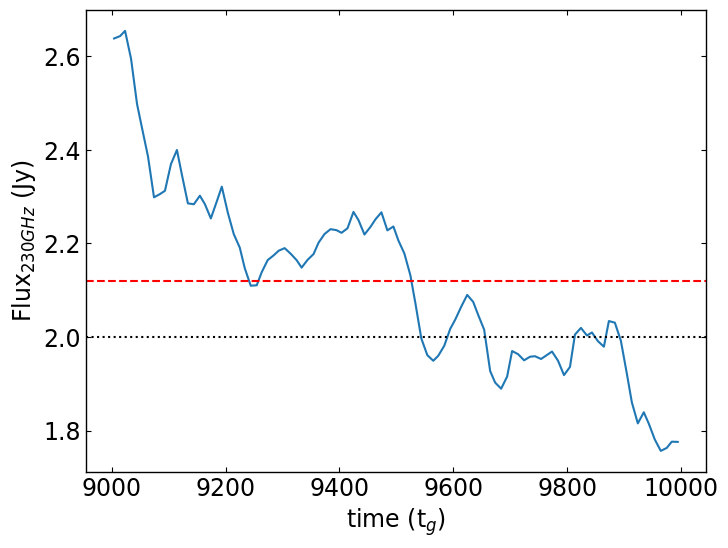

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [23]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.638139 Jy at 9004.234232
98:: 2.643247 Jy at 9014.746059
99:: 2.654377 Jy at 9023.505435
100:: 2.594715 Jy at 9034.016452
101:: 2.498040 Jy at 9044.529609
102:: 2.446642 Jy at 9053.290056
103:: 2.385794 Jy at 9063.802536
104:: 2.298686 Jy at 9074.314016
105:: 2.305619 Jy at 9084.823874
106:: 2.312705 Jy at 9093.581252
107:: 2.369680 Jy at 9104.090482
108:: 2.399848 Jy at 9114.601360
109:: 2.346724 Jy at 9123.359993
110:: 2.285698 Jy at 9133.870253
111:: 2.283882 Jy at 9144.379583
112:: 2.302136 Jy at 9154.889223
113:: 2.284215 Jy at 9163.648327
114:: 2.253555 Jy at 9174.157990
115:: 2.290133 Jy at 9184.666192
116:: 2.321425 Jy at 9193.424046
117:: 2.266058 Jy at 9203.933544
118:: 2.220015 Jy at 9214.444133
119:: 2.191201 Jy at 9224.955775
120:: 2.147302 Jy at 9233.717169
121:: 2.109769 Jy at 9244.228854
122:: 2.110678 Jy at 9254.740756
123:: 2.138629 Jy at 9263.502558
124:: 2.164533 Jy at 9274.015079
125:: 2.174701 Jy at 9284.527261
126:: 2.184531 Jy at 9293.287130
127:: 2.19008

In [24]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 50, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc50/BHOSS_CODE
97, flux: 2.864574 at 9004.234232
98, flux: 2.839641 at 9014.746059
99, flux: 2.839698 at 9023.505435
100, flux: 2.785052 at 9034.016452
101, flux: 2.685897 at 9044.529609
102, flux: 2.613894 at 9053.290056
103, flux: 2.516887 at 9063.802536
104, flux: 2.382143 at 9074.314016
105, flux: 2.373345 at 9084.823874
106, flux: 2.398587 at 9093.581252
107, flux: 2.451304 at 9104.090482
108, flux: 2.433305 at 9114.601360
109, flux: 2.376784 at 9123.359993
110, flux: 2.322645 at 9133.870253
111, flux: 2.347457 at 9144.379583
112, flux: 2.389243 at 9154.889223
113, flux: 2.378484 at 9163.648327
114, flux: 2.357977 at 9174.157990
115, flux: 2.326954 at 9184.666192
116, flux: 2.310047 at 9193.424046
117, flux: 2.253890 at 9203.933544
118, flux: 2.201907 at 9214.444133
119, flux: 2.141412 at 9224.955775
120, flux: 2.078277 at 9233.717169
121, flux: 2.023337 at 9244.228854
122, flux: 2.013011 at 9254.740756
123, flu

In [25]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [26]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.160850 Jy, the density scale = 3.600000e-18


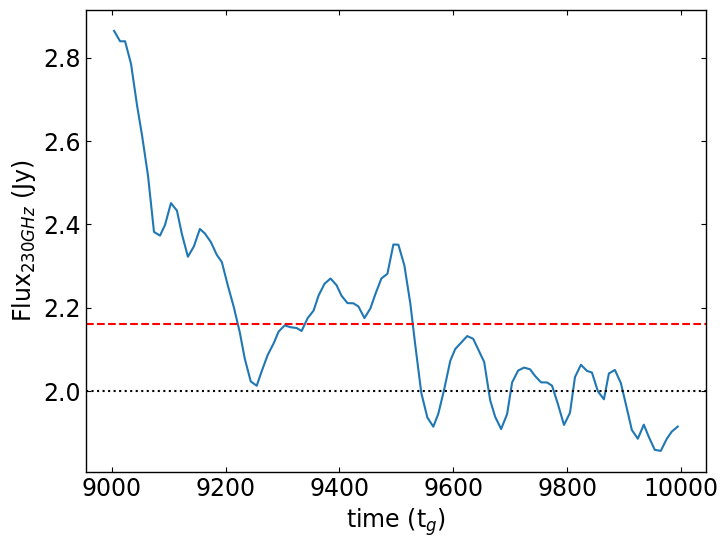

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [28]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.864574 Jy at 9004.234232
98:: 2.839641 Jy at 9014.746059
99:: 2.839698 Jy at 9023.505435
100:: 2.785052 Jy at 9034.016452
101:: 2.685897 Jy at 9044.529609
102:: 2.613894 Jy at 9053.290056
103:: 2.516887 Jy at 9063.802536
104:: 2.382143 Jy at 9074.314016
105:: 2.373345 Jy at 9084.823874
106:: 2.398587 Jy at 9093.581252
107:: 2.451304 Jy at 9104.090482
108:: 2.433305 Jy at 9114.601360
109:: 2.376784 Jy at 9123.359993
110:: 2.322645 Jy at 9133.870253
111:: 2.347457 Jy at 9144.379583
112:: 2.389243 Jy at 9154.889223
113:: 2.378484 Jy at 9163.648327
114:: 2.357977 Jy at 9174.157990
115:: 2.326954 Jy at 9184.666192
116:: 2.310047 Jy at 9193.424046
117:: 2.253890 Jy at 9203.933544
118:: 2.201907 Jy at 9214.444133
119:: 2.141412 Jy at 9224.955775
120:: 2.078277 Jy at 9233.717169
121:: 2.023337 Jy at 9244.228854
122:: 2.013011 Jy at 9254.740756
123:: 2.047967 Jy at 9263.502558
124:: 2.086883 Jy at 9274.015079
125:: 2.114903 Jy at 9284.527261
126:: 2.143184 Jy at 9293.287130
127:: 2.15785

In [29]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc70/BHOSS_CODE
97, flux: 2.611498 at 9004.234232
98, flux: 2.644660 at 9014.746059
99, flux: 2.743980 at 9023.505435
100, flux: 2.735316 at 9034.016452
101, flux: 2.650060 at 9044.529609
102, flux: 2.580538 at 9053.290056
103, flux: 2.456031 at 9063.802536
104, flux: 2.324636 at 9074.314016
105, flux: 2.369808 at 9084.823874
106, flux: 2.317157 at 9093.581252
107, flux: 2.321040 at 9104.090482
108, flux: 2.359088 at 9114.601360
109, flux: 2.292802 at 9123.359993
110, flux: 2.246393 at 9133.870253
111, flux: 2.321948 at 9144.379583
112, flux: 2.314551 at 9154.889223
113, flux: 2.221183 at 9163.648327
114, flux: 2.003326 at 9174.157990
115, flux: 1.918989 at 9184.666192
116, flux: 1.965802 at 9193.424046
117, flux: 1.974654 at 9203.933544
118, flux: 1.952011 at 9214.444133
119, flux: 1.964072 at 9224.955775
120, flux: 1.889056 at 9233.717169
121, flux: 1.815438 at 9244.228854
122, flux: 1.827970 at 9254.740756
123, flu

In [30]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [31]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.071859 Jy, the density scale = 3.240000e-18


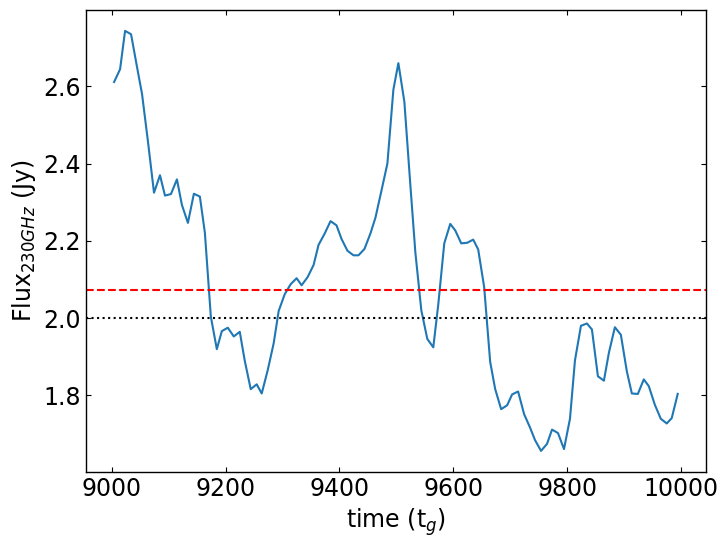

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [33]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.611498 Jy at 9004.234232
98:: 2.644660 Jy at 9014.746059
99:: 2.743980 Jy at 9023.505435
100:: 2.735316 Jy at 9034.016452
101:: 2.650060 Jy at 9044.529609
102:: 2.580538 Jy at 9053.290056
103:: 2.456031 Jy at 9063.802536
104:: 2.324636 Jy at 9074.314016
105:: 2.369808 Jy at 9084.823874
106:: 2.317157 Jy at 9093.581252
107:: 2.321040 Jy at 9104.090482
108:: 2.359088 Jy at 9114.601360
109:: 2.292802 Jy at 9123.359993
110:: 2.246393 Jy at 9133.870253
111:: 2.321948 Jy at 9144.379583
112:: 2.314551 Jy at 9154.889223
113:: 2.221183 Jy at 9163.648327
114:: 2.003326 Jy at 9174.157990
115:: 1.918989 Jy at 9184.666192
116:: 1.965802 Jy at 9193.424046
117:: 1.974654 Jy at 9203.933544
118:: 1.952011 Jy at 9214.444133
119:: 1.964072 Jy at 9224.955775
120:: 1.889056 Jy at 9233.717169
121:: 1.815438 Jy at 9244.228854
122:: 1.827970 Jy at 9254.740756
123:: 1.804169 Jy at 9263.502558
124:: 1.864467 Jy at 9274.015079
125:: 1.934319 Jy at 9284.527261
126:: 2.018005 Jy at 9293.287130
127:: 2.06113

In [34]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 90, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc90/BHOSS_CODE
97, flux: 2.637575 at 9004.234232
98, flux: 2.702025 at 9014.746059
99, flux: 2.755282 at 9023.505435
100, flux: 2.699736 at 9034.016452
101, flux: 2.596101 at 9044.529609
102, flux: 2.521904 at 9053.290056
103, flux: 2.420329 at 9063.802536
104, flux: 2.276748 at 9074.314016
105, flux: 2.227823 at 9084.823874
106, flux: 2.297810 at 9093.581252
107, flux: 2.399945 at 9104.090482
108, flux: 2.501787 at 9114.601360
109, flux: 2.448789 at 9123.359993
110, flux: 2.401363 at 9133.870253
111, flux: 2.458961 at 9144.379583
112, flux: 2.477487 at 9154.889223
113, flux: 2.353704 at 9163.648327
114, flux: 2.024448 at 9174.157990
115, flux: 1.942038 at 9184.666192
116, flux: 1.944176 at 9193.424046
117, flux: 1.938624 at 9203.933544
118, flux: 1.899178 at 9214.444133
119, flux: 1.883367 at 9224.955775
120, flux: 1.844387 at 9233.717169
121, flux: 1.811535 at 9244.228854
122, flux: 1.799804 at 9254.740756
123, flu

In [35]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [36]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.017471 Jy, the density scale = 3.220000e-18


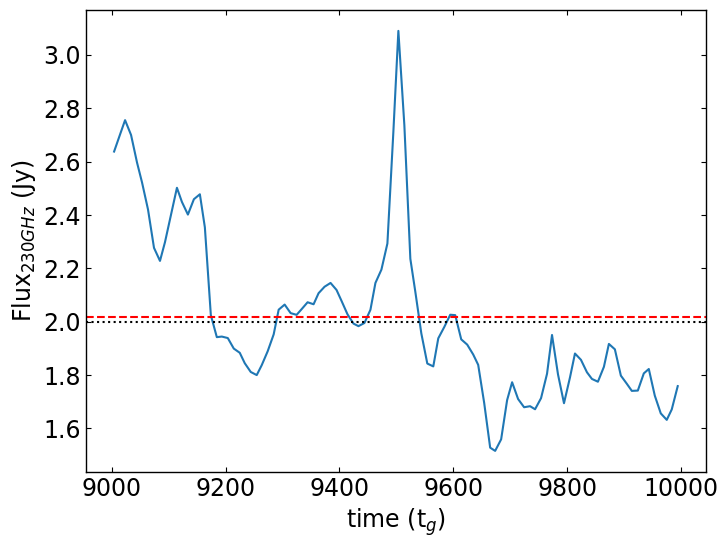

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [38]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.637575 Jy at 9004.234232
98:: 2.702025 Jy at 9014.746059
99:: 2.755282 Jy at 9023.505435
100:: 2.699736 Jy at 9034.016452
101:: 2.596101 Jy at 9044.529609
102:: 2.521904 Jy at 9053.290056
103:: 2.420329 Jy at 9063.802536
104:: 2.276748 Jy at 9074.314016
105:: 2.227823 Jy at 9084.823874
106:: 2.297810 Jy at 9093.581252
107:: 2.399945 Jy at 9104.090482
108:: 2.501787 Jy at 9114.601360
109:: 2.448789 Jy at 9123.359993
110:: 2.401363 Jy at 9133.870253
111:: 2.458961 Jy at 9144.379583
112:: 2.477487 Jy at 9154.889223
113:: 2.353704 Jy at 9163.648327
114:: 2.024448 Jy at 9174.157990
115:: 1.942038 Jy at 9184.666192
116:: 1.944176 Jy at 9193.424046
117:: 1.938624 Jy at 9203.933544
118:: 1.899178 Jy at 9214.444133
119:: 1.883367 Jy at 9224.955775
120:: 1.844387 Jy at 9233.717169
121:: 1.811535 Jy at 9244.228854
122:: 1.799804 Jy at 9254.740756
123:: 1.836871 Jy at 9263.502558
124:: 1.889275 Jy at 9274.015079
125:: 1.952481 Jy at 9284.527261
126:: 2.044962 Jy at 9293.287130
127:: 2.06408